### Loading liberary and dataset


In [1]:
library(ISLR2)
library(tree)


In [2]:
attach(Carseats)

# First create a binary response to do classification
High <- factor(ifelse(Sales <= 8, "No", "Yes"))

# Add this column to the table
# Remember use rm(list = ls()) if take a second run, or Carsearts will have several high column.
Carseats <- data.frame(Carseats, High)
head(Carseats)


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,No
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No,No
6,10.81,124,113,13,501,72,Bad,78,16,No,Yes,Yes


### Classification Tree


#### Create tree



Classification tree:
tree(formula = High ~ . - Sales, data = Carseats)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Income"      "CompPrice"   "Population" 
[6] "Advertising" "Age"         "US"         
Number of terminal nodes:  27 
Residual mean deviance:  0.4575 = 170.7 / 373 
Misclassification error rate: 0.09 = 36 / 400 

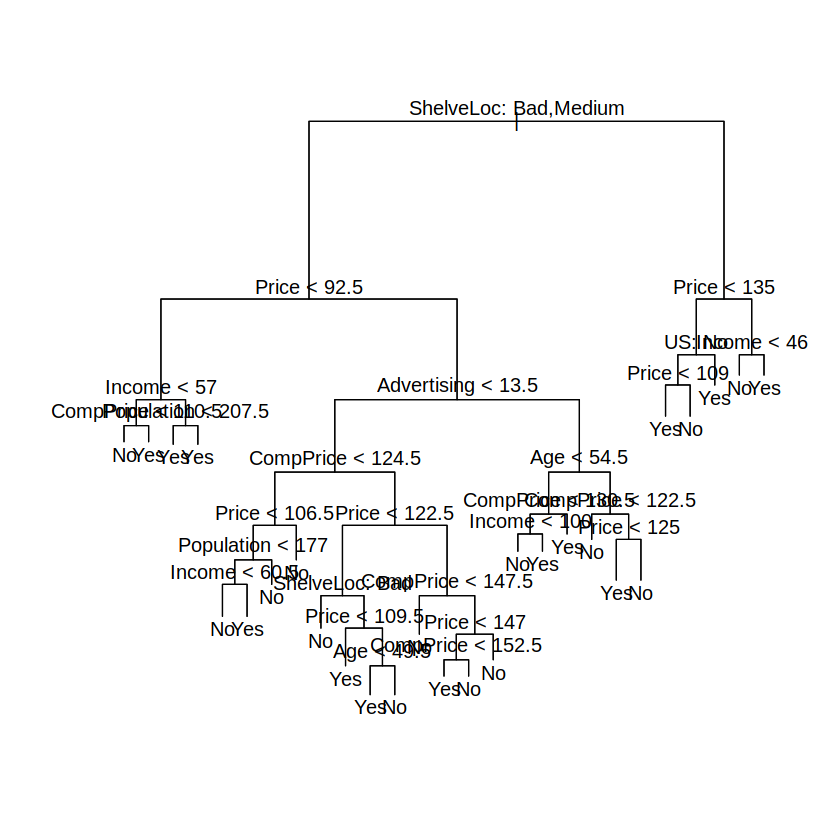

In [3]:
# tree.carseats=tree(High~Sales,Carseats)
tree.carseats <- tree(High ~ . - Sales, Carseats)
summary(tree.carseats)

plot(tree.carseats) # Display tree structure
text(tree.carseats, pretty = 0) # Display node labels


#### Pruning


[1] "size"   "dev"    "k"      "method"

$size
 [1] 27 26 24 22 19 17 14 12  7  6  5  3  2  1

$dev
 [1]  95  98 102  97  97  95  96  93  96  97 100 112 120 166

$k
 [1]      -Inf  0.000000  0.500000  1.000000  1.333333  1.500000  1.666667
 [8]  2.500000  3.800000  4.000000  5.000000  7.500000 18.000000 47.000000

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

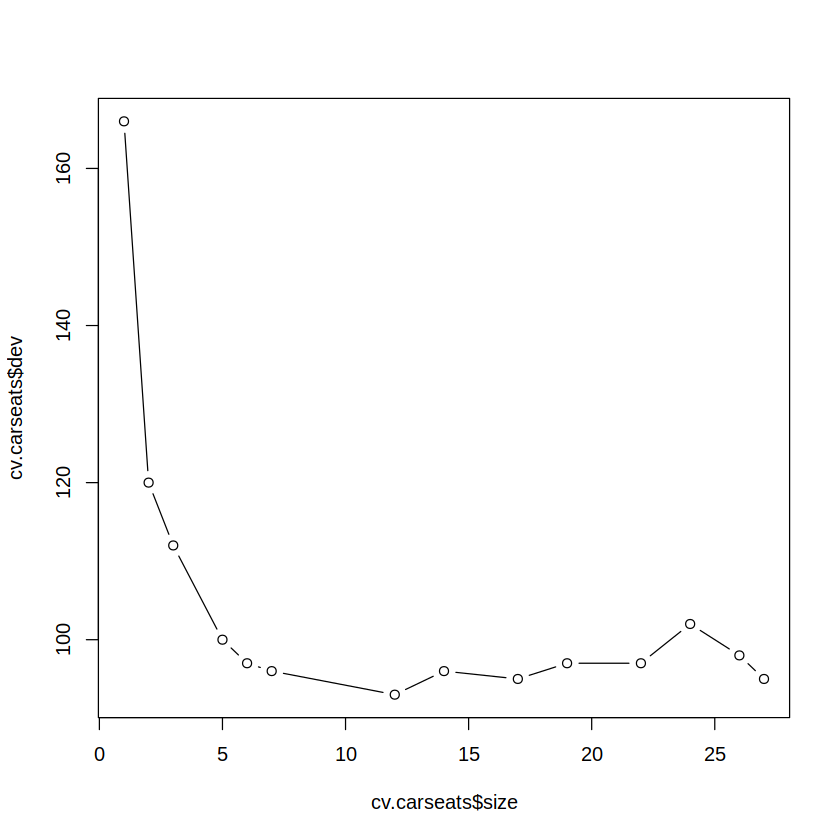

In [4]:
# Use cv.tree() to perform cross validation for tree pruning
set.seed(3)
cv.carseats <- cv.tree(tree.carseats, FUN = prune.misclass)
# FUN=prune.misclass indicates that misclassification error
# Rate is used to guide cross validation
names(cv.carseats)
cv.carseats

# Dev corresponds to the number of cross-validation errors
# Visualize results
plot(cv.carseats$size, cv.carseats$dev, type = "b")


In [5]:
# Optimal value
bestcv = cv.carseats$size[which.min(cv.carseats$dev)]
bestcv


[1] 12

#### Pruning by best CV


         High
tree.pred  No Yes
      No  198  46
      Yes  38 118

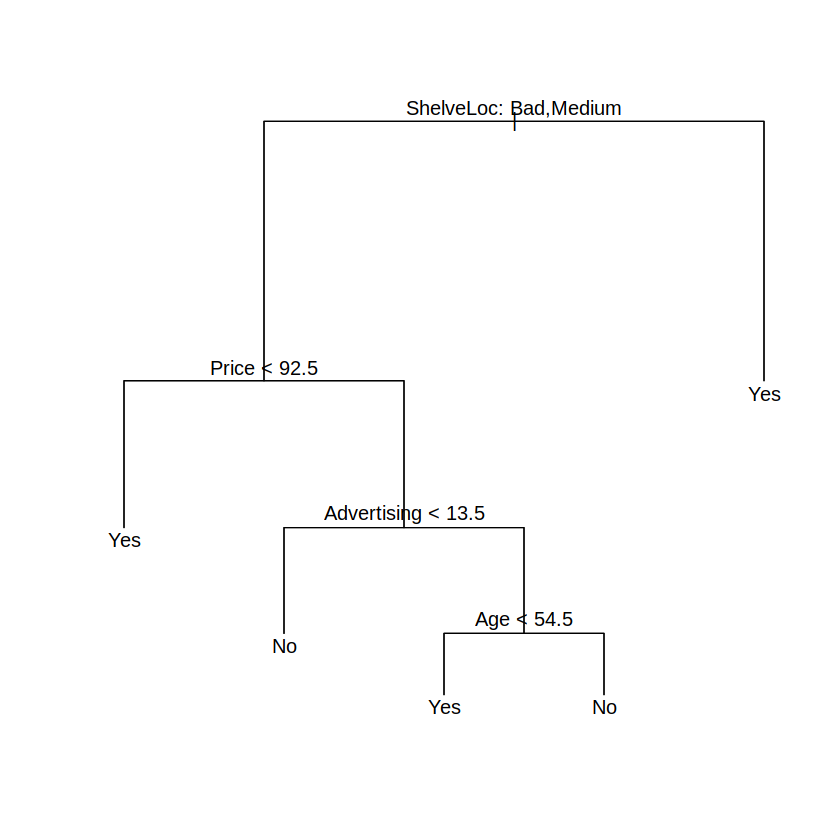

In [6]:
# Prune.misclass() based on cv results
prune.carseats <- prune.misclass(tree.carseats, best = 5)
plot(prune.carseats)
text(prune.carseats, pretty = 0)

# Test the pruned tree
tree.pred <- predict(prune.carseats, Carseats, type = "class")

# Draw the confusion matrix
table(tree.pred, High)


### Regression Tree


#### Create tree



Regression tree:
tree(formula = medv ~ ., data = Boston, subset = train)
Variables actually used in tree construction:
[1] "lstat"   "rm"      "age"     "ptratio" "tax"    
Number of terminal nodes:  9 
Residual mean deviance:  16.98 = 2699 / 159 
Distribution of residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-12.77000  -2.24000  -0.09476   0.00000   2.15700  16.43000 

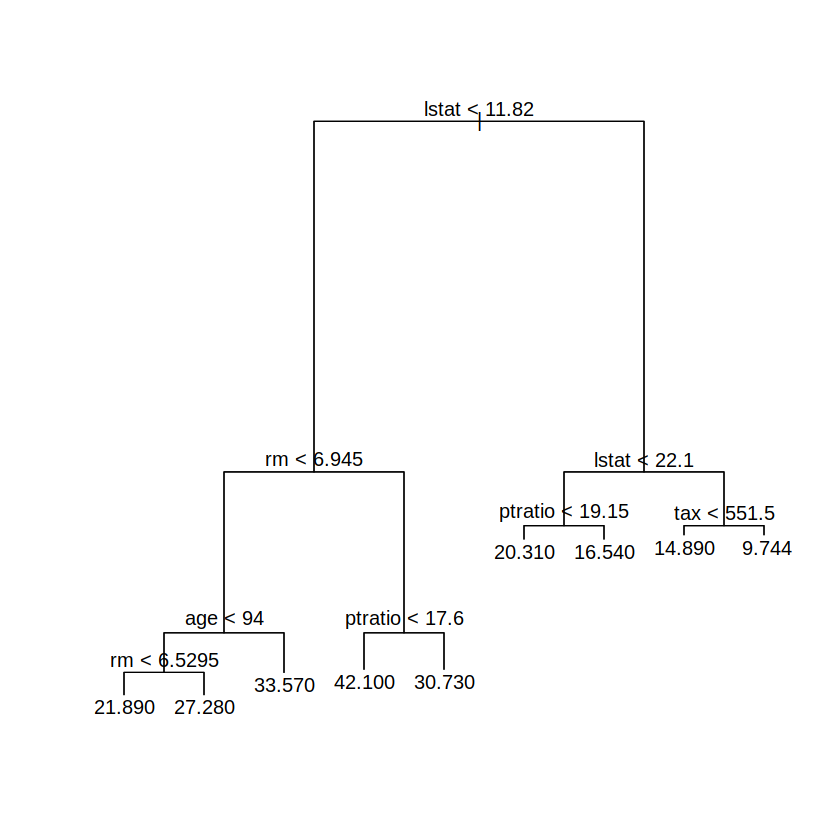

In [7]:
set.seed(5)
attach(Boston)

# Use one-third of the data to be training set
train <- sample(1:nrow(Boston), nrow(Boston) / 3)
tree.boston <- tree(medv ~ ., Boston, subset = train)
summary(tree.boston)

plot(tree.boston)
text(tree.boston, pretty = 0)


#### Pruning


$size
[1] 9 8 7 6 5 4 3 2 1

$dev
[1]  6509.102  6399.642  6402.914  7012.572  7543.398  7682.103  7362.998
[8]  9833.202 13354.595

$k
[1]      -Inf  133.2206  195.6692  325.1541  532.4504  578.6068  785.0521
[8] 2350.4377 5121.0313

$method
[1] "deviance"

attr(,"class")
[1] "prune"         "tree.sequence"

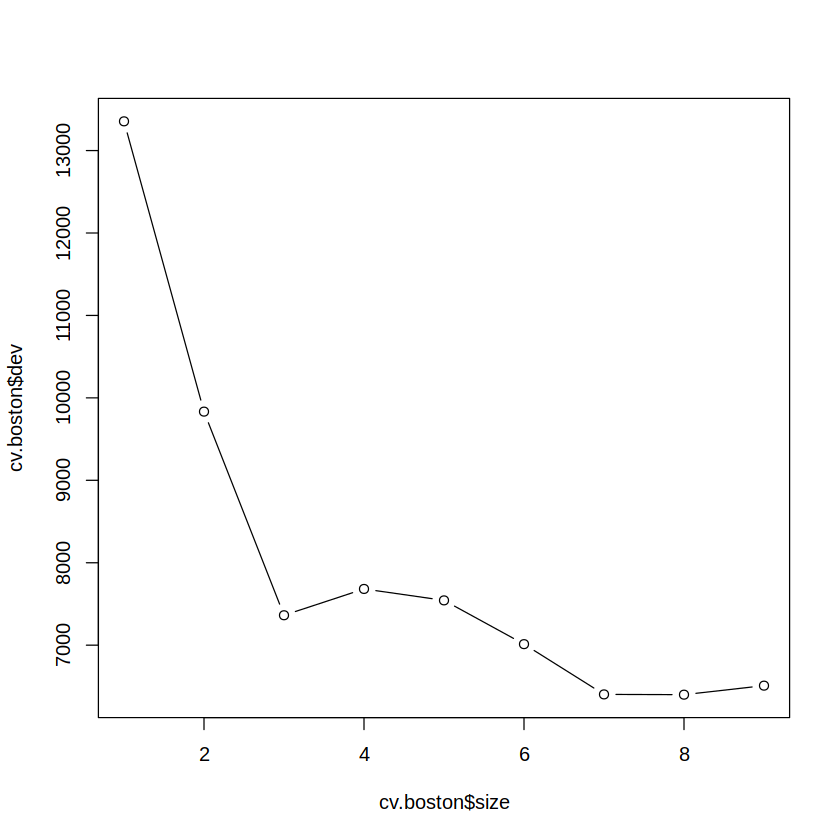

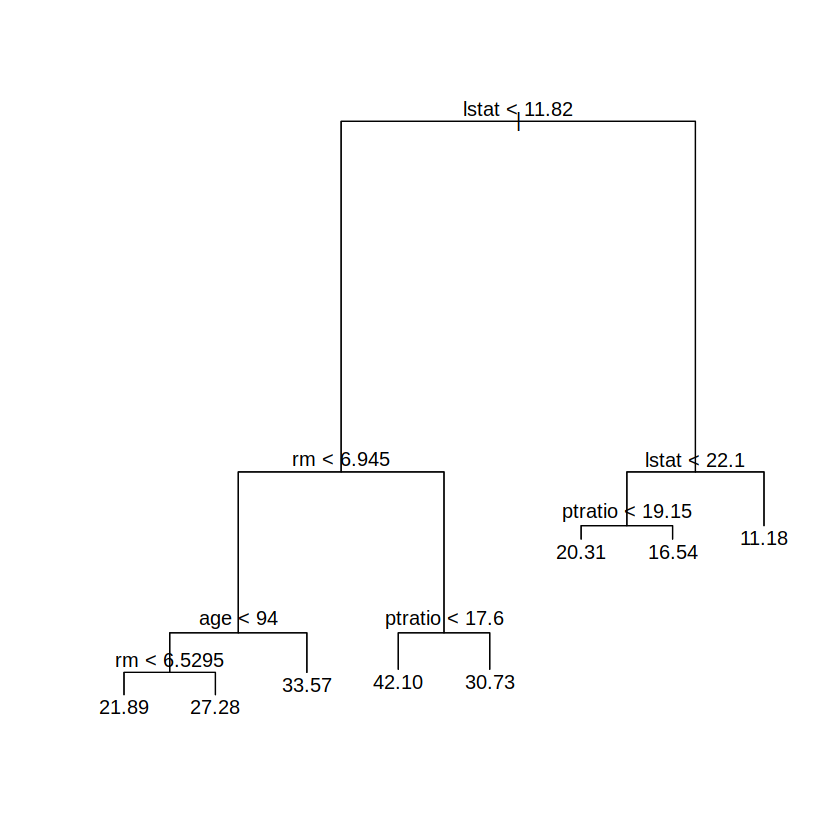

In [8]:
# Use cv.tree() to perform cross validation
cv.boston <- cv.tree(tree.boston)
plot(cv.boston$size, cv.boston$dev, type = "b")
cv.boston

bestcv = cv.boston$size[which.min(cv.boston$dev)]

prune.boston <- prune.tree(tree.boston, best = bestcv)
plot(prune.boston)
text(prune.boston, pretty = 0)


### Predict test


[1] 16.86133

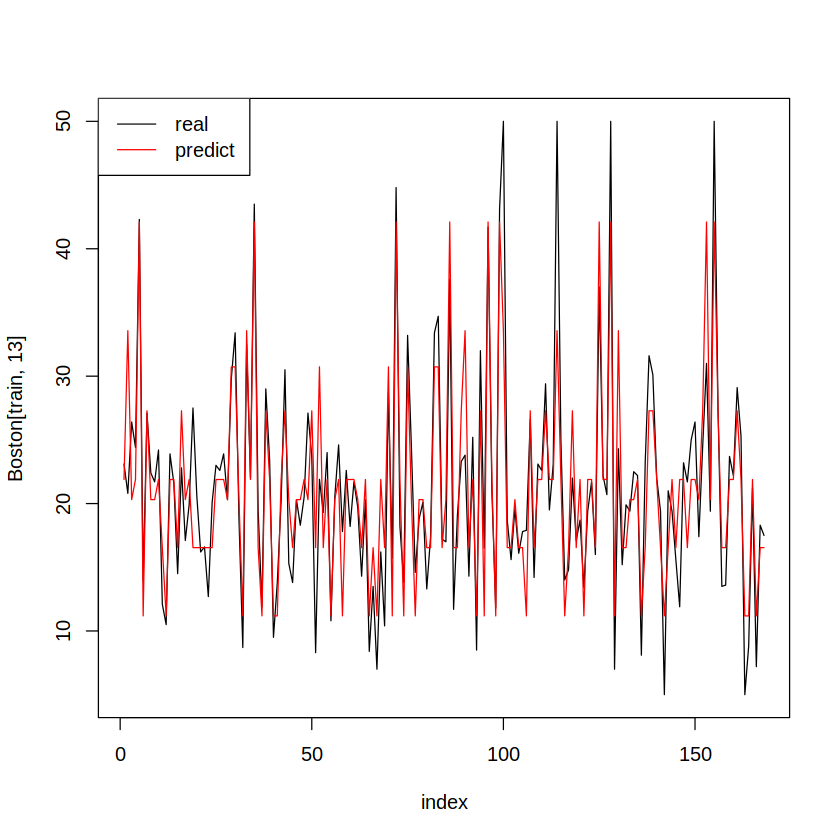

In [9]:
# Predict on the train dataset
train_pred <- predict(prune.boston, newdata = Boston[train, -13])
index <- c(1:length(train_pred))

plot(index, Boston[train, 13], type = "l")
lines(index, train_pred, col = c("red"))
legend("topleft", c("real", "predict"), col = c("black", "red"), lty = c(1, 1))

mean((train_pred - Boston[train, 13])^2)


[1] 28.09563

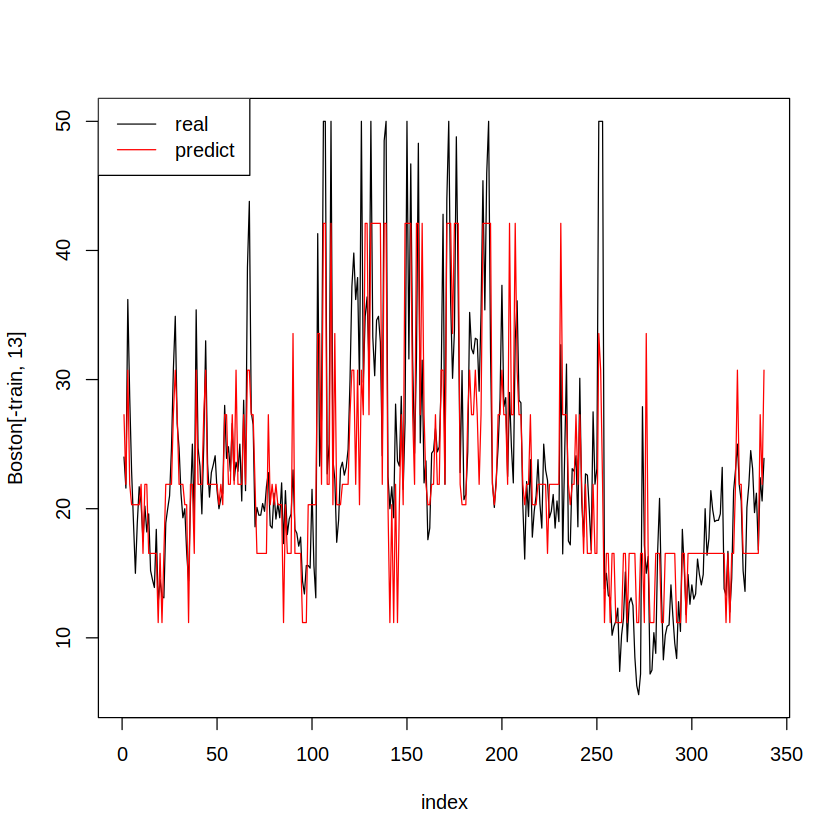

In [10]:
# Predict on the last 2/3 of the dataset
test_pred <- predict(prune.boston, newdata = Boston[-train, -13])
index <- c(1:length(test_pred))

plot(index, Boston[-train, 13], type = "l")
lines(index, test_pred, col = c("red"))
legend("topleft", c("real", "predict"), col = c("black", "red"), lty = c(1, 1))

mean((test_pred - Boston[-train, 13])^2)
